In [28]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

__REFERENCE WEBSITE__ <br>
http://h1bdata.info

In [4]:
def collect_tables(target):
    # access website, populate form, get results as html
    url = "http://h1bdata.info/index.php?em={}".format(target)
    content = requests.get(url).text
    
    #process the html code
    soup = BeautifulSoup(content)
    table = soup.find("tbody")  #go to table body
    colnames = [tag.text for tag in soup.find("thead").find_all("th")]  #fetch Column headers

    #cycle through tags and populate df with contents
    df = pd.DataFrame(
        ((tag.text for tag in lst.find_all("td")) for lst in table.find_all("tr")),
        columns = colnames
    )
    return df

### Fetch the Data from the Web

In [5]:
#list of companies for which to fetch data
targets = ["Google", "Facebook"]

#iteratively call the UDF for each company in the list
collection = [collect_tables(target) for target in targets]

/usr/local/conda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/conda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [6]:
collection[0].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,GOOGLE LLC,1615.29860,"115,000","KIRKLAND, WA",01/26/2018,07/25/2018,WITHDRAWN
1,GOOGLE LLC,1615.34491,"93,000","MOUNTAIN VIEW, CA",11/28/2017,01/22/2018,DENIED
2,GOOGLE LLC,1615.34491,"93,000","MOUNTAIN VIEW, CA",12/07/2017,01/22/2018,WITHDRAWN
3,GOOGLE INC,ACCOUNT ANALYST,"121,402","NEW YORK, NY",12/16/2015,04/05/2016,CERTIFIED
4,GOOGLE INC,ACCOUNT ASSOCIATE,"74,700","MOUNTAIN VIEW, CA",01/07/2015,05/07/2015,CERTIFIED


In [7]:
collection[1].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,FACEBOOK INC,360 VIDEO PRODUCT MARKETING MANAGER,"100,000","MENLO PARK, CA",12/22/2016,01/02/2017,CERTIFIED
1,FACEBOOK INC,360 VIDEO PRODUCT MARKETING MANAGER,"125,400","MENLO PARK, CA",02/19/2018,08/15/2018,CERTIFIED
2,FACEBOOK INC,ABUSE ANALYST,"110,000","MENLO PARK, CA",04/20/2015,05/18/2015,CERTIFIED
3,FACEBOOK INC,ACCESS MANAGEMENT LEAD,"114,642","AUSTIN, TX",03/02/2018,08/28/2018,CERTIFIED
4,FACEBOOK INC,ACCESS MANAGEMENT LEAD(INTERNAL TOOLS),"114,642","AUSTIN, TX",03/11/2017,09/09/2017,CERTIFIED


In [8]:
#combine the indiviual dataframes into one big dataframe
df = pd.concat(collection).reset_index(drop=True)
df.tail()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
22549,FACEBOOK INC,VP OF VR,"525,000","MENLO PARK, CA",02/06/2018,08/06/2018,CERTIFIED
22550,FACEBOOK INC,WEB ANALYTICS LEAD,"165,000","MENLO PARK, CA",08/16/2017,09/04/2017,CERTIFIED
22551,FACEBOOK INC,WIRELESS COMMUNICATION RESEARCHER,"145,000","MENLO PARK, CA",12/15/2016,06/14/2017,CERTIFIED
22552,FACEBOOK INC,WIRELESS COMMUNICATIONS SYSTEMS ENGINEER,"120,000","WOODLAND HILLS, CA",12/16/2016,06/15/2017,CERTIFIED
22553,FACEBOOK INC,WIRELESS SYSTEMS ENGINEER,"130,000","MENLO PARK, CA",03/07/2016,08/25/2016,CERTIFIED


In [9]:
df.columns

Index(['EMPLOYER', 'JOB TITLE', 'BASE SALARY', 'LOCATION', 'SUBMIT DATE',
       'START DATE', 'CASE STATUS'],
      dtype='object')

In [10]:
len(df)

22554

### Clean the Data

In [11]:
#get a fresh DF
df_ = pd.concat(collection).reset_index(drop=True)

#strip the comma, cast to 'int'
df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','').astype(int)
type(df_['BASE SALARY'][0])

numpy.int64

In [12]:
#add a column for the state state
newcol = df_['LOCATION'].apply(lambda x: x.split(', ') [-1])
df_['STATE'] = newcol
df_.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,GOOGLE LLC,1615.29860,115000,"KIRKLAND, WA",01/26/2018,07/25/2018,WITHDRAWN,WA
1,GOOGLE LLC,1615.34491,93000,"MOUNTAIN VIEW, CA",11/28/2017,01/22/2018,DENIED,CA
2,GOOGLE LLC,1615.34491,93000,"MOUNTAIN VIEW, CA",12/07/2017,01/22/2018,WITHDRAWN,CA
3,GOOGLE INC,ACCOUNT ANALYST,121402,"NEW YORK, NY",12/16/2015,04/05/2016,CERTIFIED,NY
4,GOOGLE INC,ACCOUNT ASSOCIATE,74700,"MOUNTAIN VIEW, CA",01/07/2015,05/07/2015,CERTIFIED,CA


### Basic Aggregation

In [13]:
agglist = ('count','mean', 'min', 'max')
pd.set_option('precision',3)

temp3 = df_.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

temp3.sort_values('count', ascending=False)

,count,max,mean,min
EMPLOYER,,,,
GOOGLE INC,12834,1139001,131253.485,56000
FACEBOOK INC,5659,525000,146641.252,48880
GOOGLE LLC,4014,370000,134978.110,54500
GOOGLE LIFE SCIENCES LLC,34,200000,132207.118,102000
FACEBOOK MIAMI INC,4,275256,186742.750,90000
FACEBOOK SERVICES INC,3,140000,136000.000,130000
GOOGLE CAPITAL MANAGEMENT COMPANY LLC,3,156000,149166.667,136500
GOOGLE VENTURES MANAGEMENT COMPANY LLC,2,152467,151233.500,150000
FACEBOOK PAYMENTS INC,1,163400,163400.000,163400


In [25]:
facebook= df_[df_['EMPLOYER']=='FACEBOOK INC']
facebook

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
16887,FACEBOOK INC,360 VIDEO PRODUCT MARKETING MANAGER,100000,"MENLO PARK, CA",12/22/2016,01/02/2017,CERTIFIED,CA
16888,FACEBOOK INC,360 VIDEO PRODUCT MARKETING MANAGER,125400,"MENLO PARK, CA",02/19/2018,08/15/2018,CERTIFIED,CA
16889,FACEBOOK INC,ABUSE ANALYST,110000,"MENLO PARK, CA",04/20/2015,05/18/2015,CERTIFIED,CA
16890,FACEBOOK INC,ACCESS MANAGEMENT LEAD,114642,"AUSTIN, TX",03/02/2018,08/28/2018,CERTIFIED,TX
16891,FACEBOOK INC,ACCESS MANAGEMENT LEAD(INTERNAL TOOLS),114642,"AUSTIN, TX",03/11/2017,09/09/2017,CERTIFIED,TX
16892,FACEBOOK INC,ACCOUNT MANAGER,85000,"CHICAGO, IL",03/19/2014,09/18/2014,CERTIFIED,IL
16893,FACEBOOK INC,"ACCOUNT MANAGER, SMALL & MEDIUM BUSINESS",79914,"AUSTIN, TX",02/19/2015,08/19/2015,CERTIFIED,TX
16894,FACEBOOK INC,"ACCOUNT MANAGER, SMB",94361,"AUSTIN, TX",03/13/2017,09/05/2017,CERTIFIED,TX
16895,FACEBOOK INC,ACCOUNTING ANALYST,109000,"MENLO PARK, CA",09/26/2016,10/10/2016,CERTIFIED,CA
16896,FACEBOOK INC,AD ASSOCIATE,91369,"MENLO PARK, CA",02/06/2017,07/31/2017,CERTIFIED,CA


In [26]:
facebook['JOB TITLE'].value_counts()

SOFTWARE_ENGINEER                                      2599
RESEARCH SCIENTIST                                      237
DATA ENGINEER                                           179
DATA SCIENTIST                                          173
PRODUCTION ENGINEER                                     158
PRODUCT MANAGER                                         127
PRODUCT DESIGNER                                        121
ENGINEERING MANAGER                                     103
FRONT END ENGINEER                                       82
TECHNICAL PROGRAM MANAGER                                60
APPLICATION ENGINEER                                     58
SOLUTIONS ENGINEER                                       40
UX RESEARCHER                                            39
DEVELOPER_                                               38
NETWORK ENGINEER                                         29
GROWTH MARKETING ANALYST                                 27
CLIENT SOLUTIONS MANAGER                

In [16]:
#show types of jobs
df_['JOB TITLE'].value_counts()

SOFTWARE ENGINEER                                         9007
PRODUCT MANAGER                                            291
RESEARCH SCIENTIST                                         280
SOFTWARE ENGINEER IN TEST                                  207
DATA ENGINEER                                              179
DATA SCIENTIST                                             177
TECHNICAL PROGRAM MANAGER                                  173
PRODUCTION ENGINEER                                        158
PROGRAM MANAGER                                            139
HARDWARE ENGINEER                                          133
PRODUCT DESIGNER                                           122
ENGINEERING MANAGER                                        105
TEST ENGINEER                                              104
NETWORK ENGINEER                                            93
QUANTITATIVE ANALYST                                        91
BUSINESS SYSTEMS INTEGRATOR                            

#### Facebook Only

In [29]:
#show types of jobs
df_2 = collection[1] #Company2 df

df_2['BASE SALARY']= df_2['BASE SALARY'].astype(int)

df_2['JOB TITLE'].value_counts()

SOFTWARE ENGINEER                               2519
RESEARCH SCIENTIST                               237
DATA ENGINEER                                    179
DATA SCIENTIST                                   173
PRODUCTION ENGINEER                              158
PRODUCT MANAGER                                  127
PRODUCT DESIGNER                                 121
ENGINEERING MANAGER                              103
FRONT END ENGINEER                                82
TECHNICAL PROGRAM MANAGER                         60
APPLICATION ENGINEER                              58
SOLUTIONS ENGINEER                                40
UX RESEARCHER                                     39
NETWORK ENGINEER                                  29
SOFTWARE ENGINEERING MANAGER                      28
GROWTH MARKETING ANALYST                          27
CLIENT SOLUTIONS MANAGER                          24
SECURITY ENGINEER                                 23
SMB ANALYST                                   

In [30]:
%matplotlib inline

agglist = ('count', 'mean', 'max')
new = df_2.pivot_table('BASE SALARY', index='JOB TITLE', aggfunc=agglist)
new.sort_values('mean', ascending = False)

,count,max,mean
JOB TITLE,,,
VP OF VR,1,525000,525000.000
"DIRECTOR, PRODUCT MANAGEMENT",2,340000,340000.000
"DIRECTOR, NETWORK INVESTMENTS",1,320000,320000.000
ENGINEERING DIRECTOR,2,297577,293788.500
"DIRECTOR, RESEARCH SCIENCE",1,283194,283194.000
DIR. OF INT'L BUS. DEV. AND OPERATOR PARTNERSHIPS,1,280000,280000.000
HEAD OF PAN REGIONAL,1,275256,275256.000
PUBLISHER EXPERIENCE DIRECTOR,1,275000,275000.000
"DIRECTOR, ENGINEERING",3,297984,270529.667


EMPLOYER
FACEBOOK INC             AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK MIAMI INC       AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK PAYMENTS INC    AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK SERVICES INC    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

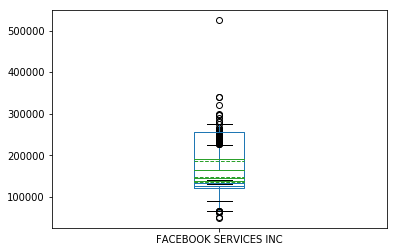

In [19]:
df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='box', legend = True, meanline = True, showmeans=True)


EMPLOYER
FACEBOOK INC             AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK MIAMI INC       AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK PAYMENTS INC    AxesSubplot(0.125,0.125;0.775x0.755)
FACEBOOK SERVICES INC    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

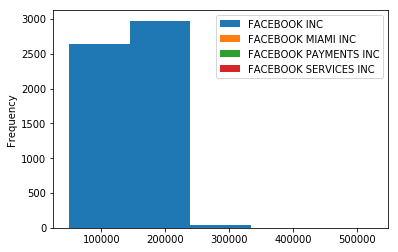

In [20]:

df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='hist', legend = True, bins=5)


### Merge Titles in main DF

In [31]:
#two ways to merge similar titles 
#method1
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('SOFTWARE ENGINEER')] ="SOFTWARE_ENGINEER"

#method2
df_['JOB TITLE']= df_['JOB TITLE'].apply(lambda x: "MACHINE_LEARNING" if "MACHINE LEARNING" in x else x)

##bonus grouping
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('DEVELOPER')] ="DEVELOPER_"


df_['JOB TITLE'].value_counts()

/usr/local/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/conda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


SOFTWARE_ENGINEER                                     14845
PRODUCT MANAGER                                         291
RESEARCH SCIENTIST                                      280
DATA ENGINEER                                           179
DATA SCIENTIST                                          177
TECHNICAL PROGRAM MANAGER                               173
PRODUCTION ENGINEER                                     158
DEVELOPER_                                              142
PROGRAM MANAGER                                         139
HARDWARE ENGINEER                                       133
PRODUCT DESIGNER                                        122
ENGINEERING MANAGER                                     105
TEST ENGINEER                                           104
NETWORK ENGINEER                                         93
QUANTITATIVE ANALYST                                     91
BUSINESS SYSTEMS INTEGRATOR                              90
INTERACTION DESIGNER                    

In [22]:
%matplotlib inline
import seaborn as sns
sns.set()

#filter/sub-set just on a single job description
position1 = df_[df_['JOB TITLE'] == 'MACHINE_LEARNING']
position1

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
1688,GOOGLE INC,MACHINE_LEARNING,155000,"MOUNTAIN VIEW, CA",08/17/2016,08/25/2016,CERTIFIED,CA
1689,GOOGLE LLC,MACHINE_LEARNING,110000,"NEW YORK, NY",11/16/2017,11/23/2017,CERTIFIED,NY


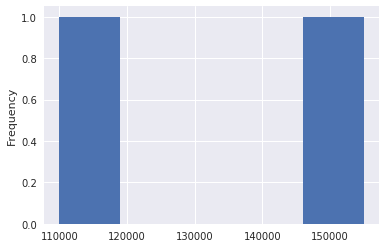

In [23]:
position1['BASE SALARY'].plot(kind='hist', bins=5)

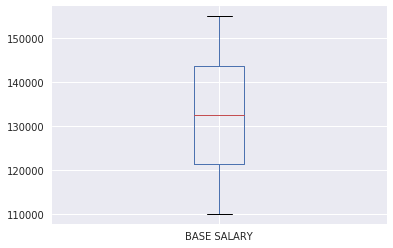

In [24]:
position1['BASE SALARY'].plot(kind='box', legend=True)